Instalaciones

In [1]:
#!pip install xgboost

In [2]:
#!pip install lightgbm

In [3]:
#!conda config --add channels conda-forge
#!conda install catboost -y

In [4]:
#!pip install scikit-plot

## Prediciendo quiebra de empresas

En esta práctica guiada vamos a trabajar en predecir la quiebra de empresas en Polonia. La información fue obtenida del Servicio de Información de Mercados Emergentes (EMIS por sus siglas en inglés), que es una base de datos que contiene información de los mercados emergentes alrededor del mundo. Las compañías en bancarrota fueron analizadas en el período 2000-2012, mientras que las que continuan operando se evaluaron desde 2007 a 2013.

En este caso sólo vamos a trabajar con el tercer año de los disponibles. Se puede consultar la página de UCI en donde se encuentra alojado <a href='https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'> aqui </a> 

El dataset empleado tiene datos de las empresas y su estatus tres años después.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../Data/3year.csv")

In [7]:
df.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [8]:
df = df.drop("Unnamed: 0", axis = 1)

Acá hay una descripción de los atributos

X1 net profit / total assets

X2 total liabilities / total assets

X3 working capital / total assets

X4 current assets / short-term liabilities

X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

X6 retained earnings / total assets

X7 EBIT / total assets

X8 book value of equity / total liabilities

X9 sales / total assets

X10 equity / total assets

X11 (gross profit + extraordinary items + financial expenses) / total assets

X12 gross profit / short-term liabilities

X13 (gross profit + depreciation) / sales

X14 (gross profit + interest) / total assets

X15 (total liabilities * 365) / (gross profit + depreciation)

X16 (gross profit + depreciation) / total liabilities

X17 total assets / total liabilities

X18 gross profit / total assets

X19 gross profit / sales

X20 (inventory * 365) / sales

X21 sales (n) / sales (n-1)

X22 profit on operating activities / total assets

X23 net profit / sales

X24 gross profit (in 3 years) / total assets

X25 (equity - share capital) / total assets

X26 (net profit + depreciation) / total liabilities

X27 profit on operating activities / financial expenses

X28 working capital / fixed assets

X29 logarithm of total assets

X30 (total liabilities - cash) / sales

X31 (gross profit + interest) / sales

X32 (current liabilities * 365) / cost of products sold

X33 operating expenses / short-term liabilities

X34 operating expenses / total liabilities

X35 profit on sales / total assets

X36 total sales / total assets

X37 (current assets - inventories) / long-term liabilities

X38 constant capital / total assets

X39 profit on sales / sales

X40 (current assets - inventory - receivables) / short-term liabilities

X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))

X42 profit on operating activities / sales

X43 rotation receivables + inventory turnover in days

X44 (receivables * 365) / sales

X45 net profit / inventory

X46 (current assets - inventory) / short-term liabilities

X47 (inventory * 365) / cost of products sold

X48 EBITDA (profit on operating activities - depreciation) / total assets

X49 EBITDA (profit on operating activities - depreciation) / sales

X50 current assets / total liabilities

X51 short-term liabilities / total assets

X52 (short-term liabilities * 365) / cost of products sold)

X53 equity / fixed assets

X54 constant capital / fixed assets

X55 working capital

X56 (sales - cost of products sold) / sales

X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

X58 total costs /total sales

X59 long-term liabilities / equity

X60 sales / inventory

X61 sales / receivables

X62 (short-term liabilities *365) / sales

X63 sales / short-term liabilities

X64 sales / fixed assets

Transforme la clase en 0 y 1, para ello puede emplear LabelEncoder

In [9]:
y = df["class"]
X = df.drop("class", axis = 1)

In [10]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  10503  filas y  64  columnas


In [11]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [12]:
encoder = LabelEncoder()

In [13]:
y.head()

0    b'0'
1    b'0'
2    b'0'
3    b'0'
4    b'0'
Name: class, dtype: object

In [14]:
y = encoder.fit_transform(y)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

Hagamos un split en train y test.

In [16]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [19]:
model_knn = KNeighborsClassifier()

In [20]:
params = {"n_neighbors":list(range(3,8))}

In [21]:
knn = GridSearchCV(model_knn, params, verbose= True)

Imputamos los NA con 0

In [22]:
X_train_na = X_train.fillna(0)
X_test_na = X_test.fillna(0)

In [23]:
stds = StandardScaler()

In [24]:
X_train_knn = stds.fit_transform(X_train_na)

In [25]:
X_test_knn = stds.transform(X_test_na)

In [26]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
La búsqueda con knn llevó:  21.761000633239746  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   21.6s finished


In [27]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [28]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.606661285890919


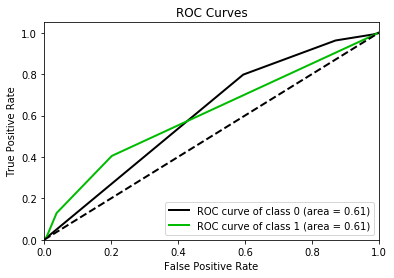

In [29]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rf = RandomForestClassifier()

In [32]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [33]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [34]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [35]:
start = time.time()
rf.fit(X_train_na,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   38.1s finished


La búsqueda con Random Forest llevó:  39.42599821090698  segundos


In [36]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_predicted_rf = rf.predict_proba(X_test_na)

In [38]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.8656443192746256


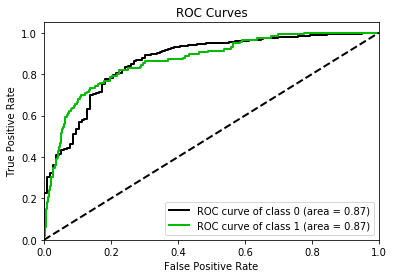

In [39]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [40]:
from xgboost.sklearn import XGBClassifier

In [41]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [42]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [43]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Se puede consultar los parámetros <a = "http://xgboost.readthedocs.io/en/latest/python/python_api.html"> aquí </a> y <a = "https://github.com/dmlc/xgboost/blob/master/doc/parameter.md"> aquí </a>

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [44]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

¿Es necesario normalizar los features antes de aplicar XGBoost?

In [45]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   48.3s finished


La búsqueda con XGBoost llevó:  49.495996952056885  segundos


In [46]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [47]:
y_predicted_xgb[:,0].shape

(2626,)

In [48]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.9098244951229566


Graficamos la curva ROC por clase

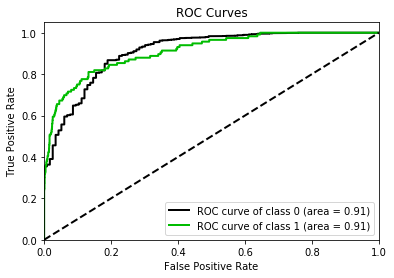

In [49]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

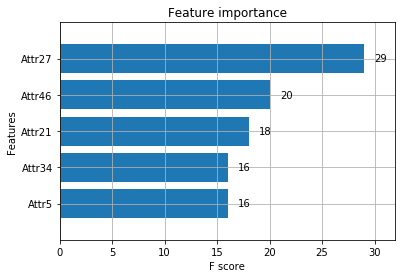

In [50]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

Entonces, los principales atributos son:
- profit on operating activities / financial expenses
- (current assets - inventory) / short-term liabilities
- sales (n) / sales (n-1)
- operating expenses / total liabilities
- logarithm of total assets

También se pueden acceder los valores directamente con el atributo feature_importances_

In [51]:
print(xgb.best_estimator_.feature_importances_)

[0.         0.01778806 0.         0.01397901 0.02881471 0.02116011
 0.         0.         0.01626058 0.         0.         0.
 0.01931717 0.         0.01220524 0.03047964 0.         0.
 0.01398675 0.         0.02727861 0.02749687 0.         0.01832783
 0.03007279 0.03580766 0.03491632 0.         0.0195449  0.01370115
 0.         0.06115788 0.04358184 0.06601632 0.01967025 0.01445844
 0.         0.01788567 0.02141831 0.01712284 0.01261976 0.01779275
 0.01667679 0.04614038 0.01308591 0.02497116 0.03029246 0.0075392
 0.03434498 0.         0.01819137 0.         0.         0.
 0.01511355 0.06144894 0.01509389 0.02123041 0.         0.00931572
 0.01369377 0.         0.         0.        ]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [52]:
import lightgbm as lgb

In [53]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [54]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [55]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.3s finished


La búsqueda con LightGBM llevó:  15.73499608039856  segundos


In [56]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.9023115279537325, 'gamma': 3.3512110967960664, 'learning_rate': 0.2707170456509603, 'max_depth': 7, 'min_child_weight': 2.849619854468436, 'n_estimators': 36, 'reg_alpha': 7.2076512640795585, 'subsample': 0.9757268827165553}


In [57]:
opt_lgbm = lgbm.best_estimator_

In [58]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [59]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.9157147272977058


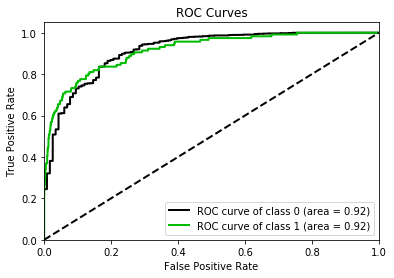

In [60]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

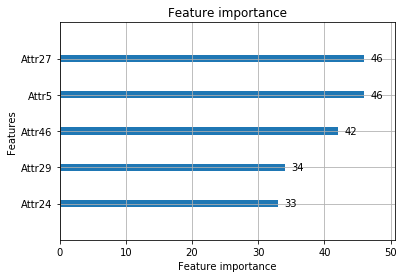

In [61]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [62]:
lgbm.best_estimator_.feature_importances_

array([ 1,  2,  6,  4, 46,  7,  1,  0, 20,  0,  3,  7, 11,  0,  7,  4,  0,
        0,  4, 10, 27, 13,  4, 33,  9, 11, 46, 14, 34, 15,  2, 11, 10, 30,
       13,  0, 18,  7, 16, 21, 17, 11,  5, 16, 15, 42, 18,  5,  9,  2,  4,
        3,  3, 15, 11, 19, 11, 24, 12, 21, 23,  3,  4,  6])

## CatBoost

In [63]:
from catboost import CatBoostClassifier

In [64]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [65]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.030047
0:	learn: 0.6421788	total: 242ms	remaining: 4m 2s
1:	learn: 0.6034238	total: 370ms	remaining: 3m 4s
2:	learn: 0.5682249	total: 493ms	remaining: 2m 43s
3:	learn: 0.5353132	total: 604ms	remaining: 2m 30s
4:	learn: 0.4977198	total: 728ms	remaining: 2m 24s
5:	learn: 0.4686407	total: 882ms	remaining: 2m 26s
6:	learn: 0.4444514	total: 1.03s	remaining: 2m 26s
7:	learn: 0.4218354	total: 1.18s	remaining: 2m 26s
8:	learn: 0.4010598	total: 1.32s	remaining: 2m 25s
9:	learn: 0.3817539	total: 1.47s	remaining: 2m 25s
10:	learn: 0.3645360	total: 1.6s	remaining: 2m 23s
11:	learn: 0.3489776	total: 1.71s	remaining: 2m 20s
12:	learn: 0.3339606	total: 1.82s	remaining: 2m 18s
13:	learn: 0.3206434	total: 1.94s	remaining: 2m 16s
14:	learn: 0.3055495	total: 2.06s	remaining: 2m 15s
15:	learn: 0.2944909	total: 2.19s	remaining: 2m 14s
16:	learn: 0.2844419	total: 2.33s	remaining: 2m 15s
17:	learn: 0.2708729	total: 2.47s	remaining: 2m 14s
18:	learn: 0.2581176	total: 2.61s	remaining: 2m

160:	learn: 0.0921428	total: 19.9s	remaining: 1m 43s
161:	learn: 0.0920711	total: 20s	remaining: 1m 43s
162:	learn: 0.0920009	total: 20.2s	remaining: 1m 43s
163:	learn: 0.0918920	total: 20.3s	remaining: 1m 43s
164:	learn: 0.0918012	total: 20.4s	remaining: 1m 43s
165:	learn: 0.0917352	total: 20.5s	remaining: 1m 42s
166:	learn: 0.0915932	total: 20.6s	remaining: 1m 42s
167:	learn: 0.0913069	total: 20.7s	remaining: 1m 42s
168:	learn: 0.0910718	total: 20.8s	remaining: 1m 42s
169:	learn: 0.0907878	total: 20.9s	remaining: 1m 42s
170:	learn: 0.0905640	total: 21.1s	remaining: 1m 42s
171:	learn: 0.0904577	total: 21.2s	remaining: 1m 41s
172:	learn: 0.0902691	total: 21.3s	remaining: 1m 41s
173:	learn: 0.0900430	total: 21.4s	remaining: 1m 41s
174:	learn: 0.0898848	total: 21.5s	remaining: 1m 41s
175:	learn: 0.0896097	total: 21.6s	remaining: 1m 41s
176:	learn: 0.0894697	total: 21.7s	remaining: 1m 41s
177:	learn: 0.0893431	total: 21.9s	remaining: 1m 40s
178:	learn: 0.0891806	total: 22s	remaining: 1m 4

316:	learn: 0.0725841	total: 39.7s	remaining: 1m 25s
317:	learn: 0.0724579	total: 39.8s	remaining: 1m 25s
318:	learn: 0.0723623	total: 40s	remaining: 1m 25s
319:	learn: 0.0722055	total: 40.2s	remaining: 1m 25s
320:	learn: 0.0721836	total: 40.4s	remaining: 1m 25s
321:	learn: 0.0720771	total: 40.5s	remaining: 1m 25s
322:	learn: 0.0720324	total: 40.7s	remaining: 1m 25s
323:	learn: 0.0719215	total: 40.9s	remaining: 1m 25s
324:	learn: 0.0716788	total: 41s	remaining: 1m 25s
325:	learn: 0.0716224	total: 41.2s	remaining: 1m 25s
326:	learn: 0.0715179	total: 41.4s	remaining: 1m 25s
327:	learn: 0.0714986	total: 41.5s	remaining: 1m 25s
328:	learn: 0.0714327	total: 41.6s	remaining: 1m 24s
329:	learn: 0.0713382	total: 41.8s	remaining: 1m 24s
330:	learn: 0.0711929	total: 41.9s	remaining: 1m 24s
331:	learn: 0.0710911	total: 42.1s	remaining: 1m 24s
332:	learn: 0.0709198	total: 42.3s	remaining: 1m 24s
333:	learn: 0.0707043	total: 42.4s	remaining: 1m 24s
334:	learn: 0.0705975	total: 42.5s	remaining: 1m 2

472:	learn: 0.0589738	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.0588939	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.0588069	total: 1m 1s	remaining: 1m 8s
475:	learn: 0.0586937	total: 1m 1s	remaining: 1m 8s
476:	learn: 0.0586575	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.0585543	total: 1m 2s	remaining: 1m 7s
478:	learn: 0.0584638	total: 1m 2s	remaining: 1m 7s
479:	learn: 0.0583024	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.0582624	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.0582413	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.0581971	total: 1m 2s	remaining: 1m 7s
483:	learn: 0.0581440	total: 1m 2s	remaining: 1m 7s
484:	learn: 0.0580719	total: 1m 3s	remaining: 1m 6s
485:	learn: 0.0580428	total: 1m 3s	remaining: 1m 6s
486:	learn: 0.0579514	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.0579001	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.0578506	total: 1m 3s	remaining: 1m 6s
489:	learn: 0.0577772	total: 1m 3s	remaining: 1m 6s
490:	learn: 0.0576471	total: 1m 3s	remaining: 1m 6s
491:	learn: 

630:	learn: 0.0501833	total: 1m 20s	remaining: 46.9s
631:	learn: 0.0501648	total: 1m 20s	remaining: 46.8s
632:	learn: 0.0501435	total: 1m 20s	remaining: 46.6s
633:	learn: 0.0501052	total: 1m 20s	remaining: 46.5s
634:	learn: 0.0500645	total: 1m 20s	remaining: 46.4s
635:	learn: 0.0500158	total: 1m 20s	remaining: 46.2s
636:	learn: 0.0499815	total: 1m 20s	remaining: 46.1s
637:	learn: 0.0499445	total: 1m 21s	remaining: 46s
638:	learn: 0.0499231	total: 1m 21s	remaining: 45.8s
639:	learn: 0.0498939	total: 1m 21s	remaining: 45.7s
640:	learn: 0.0498818	total: 1m 21s	remaining: 45.6s
641:	learn: 0.0498608	total: 1m 21s	remaining: 45.4s
642:	learn: 0.0498575	total: 1m 21s	remaining: 45.3s
643:	learn: 0.0498058	total: 1m 21s	remaining: 45.2s
644:	learn: 0.0497382	total: 1m 21s	remaining: 45.1s
645:	learn: 0.0497243	total: 1m 22s	remaining: 44.9s
646:	learn: 0.0496752	total: 1m 22s	remaining: 44.8s
647:	learn: 0.0495896	total: 1m 22s	remaining: 44.7s
648:	learn: 0.0495257	total: 1m 22s	remaining: 4

786:	learn: 0.0428615	total: 1m 38s	remaining: 26.7s
787:	learn: 0.0428003	total: 1m 38s	remaining: 26.6s
788:	learn: 0.0427452	total: 1m 39s	remaining: 26.5s
789:	learn: 0.0427287	total: 1m 39s	remaining: 26.3s
790:	learn: 0.0426740	total: 1m 39s	remaining: 26.2s
791:	learn: 0.0426261	total: 1m 39s	remaining: 26.1s
792:	learn: 0.0426090	total: 1m 39s	remaining: 26s
793:	learn: 0.0425581	total: 1m 39s	remaining: 25.8s
794:	learn: 0.0425364	total: 1m 39s	remaining: 25.7s
795:	learn: 0.0425200	total: 1m 39s	remaining: 25.6s
796:	learn: 0.0424852	total: 1m 39s	remaining: 25.4s
797:	learn: 0.0423901	total: 1m 40s	remaining: 25.3s
798:	learn: 0.0423736	total: 1m 40s	remaining: 25.2s
799:	learn: 0.0423655	total: 1m 40s	remaining: 25.1s
800:	learn: 0.0423568	total: 1m 40s	remaining: 24.9s
801:	learn: 0.0422363	total: 1m 40s	remaining: 24.8s
802:	learn: 0.0421170	total: 1m 40s	remaining: 24.7s
803:	learn: 0.0421047	total: 1m 40s	remaining: 24.5s
804:	learn: 0.0420927	total: 1m 40s	remaining: 2

942:	learn: 0.0372290	total: 1m 57s	remaining: 7.13s
943:	learn: 0.0372241	total: 1m 58s	remaining: 7s
944:	learn: 0.0371978	total: 1m 58s	remaining: 6.88s
945:	learn: 0.0371856	total: 1m 58s	remaining: 6.75s
946:	learn: 0.0371200	total: 1m 58s	remaining: 6.63s
947:	learn: 0.0370851	total: 1m 58s	remaining: 6.5s
948:	learn: 0.0370483	total: 1m 58s	remaining: 6.38s
949:	learn: 0.0370263	total: 1m 58s	remaining: 6.25s
950:	learn: 0.0370165	total: 1m 58s	remaining: 6.13s
951:	learn: 0.0369911	total: 1m 59s	remaining: 6.01s
952:	learn: 0.0369732	total: 1m 59s	remaining: 5.88s
953:	learn: 0.0369466	total: 1m 59s	remaining: 5.76s
954:	learn: 0.0369281	total: 1m 59s	remaining: 5.63s
955:	learn: 0.0369196	total: 1m 59s	remaining: 5.51s
956:	learn: 0.0369113	total: 1m 59s	remaining: 5.38s
957:	learn: 0.0368875	total: 2m	remaining: 5.26s
958:	learn: 0.0368317	total: 2m	remaining: 5.14s
959:	learn: 0.0368240	total: 2m	remaining: 5.01s
960:	learn: 0.0367537	total: 2m	remaining: 4.89s
961:	learn: 0

In [66]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [67]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.9269679901085313


La lista de hiperparámetros se puede consultar <a = "https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

## Conclusiones

In [68]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.606661285890919  
 - AUC de RF: 0.8656443192746256  
 - AUC de XGBoost: 0.9098244951229566 
 - AUC de LightGBM: 0.9157147272977058 
 - AUC de CatBoost: 0.9269679901085313


Otros resultados finales fueron:
 - AUC de knn: 0.611448533827  
 - AUC de RF: 0.861997410428  
 - AUC de XGBoost: 0.917590322258 
 - AUC de LightGBM: 0.926237865292 
 - AUC de CatBoost: 0.929962720176


Otros resultados finales fueron:
 - AUC de knn: 0.637398382501  
 - AUC de RF: 0.860488951279  
 - AUC de XGBoost: 0.923338152308 
 - AUC de LightGBM: 0.941349941334 
 - AUC de CatBoost: 0.945510671583
